# 不训练 A

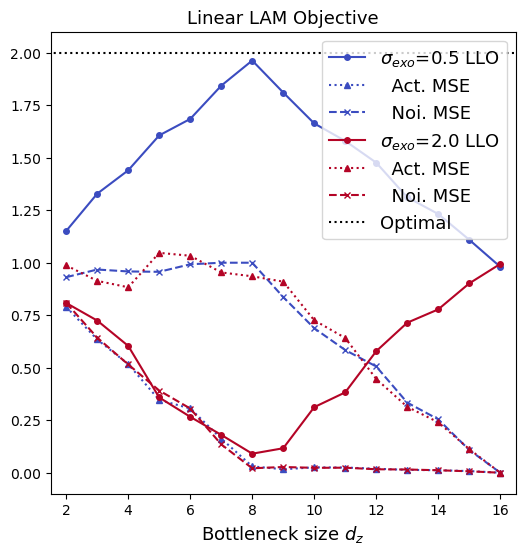

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/4_3_False_long_train_predB.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['noi_mse'] = total_record['noi_mse'] * (total_record['sigma'] ** 2)
total_record['noi_mse'] = total_record['noi_mse'].clip(lower=0.0, upper=1.0)
total_record['LLO'] = - total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('sigma')) - 1) 

counter = 0
for sig_value, group in total_record.groupby('sigma'):
    # 按dz排序确保连线正确
    sorted_group = group.sort_values('dz')
    plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}$='+f'{sig_value} LLO', marker='o', markersize=4, color=cmap(norm(counter)))
    plt.plot(sorted_group['dz'], sorted_group['act_mse'], label=f'  Act. MSE', ls='dotted', marker='^', markersize=4, color=cmap(norm(counter)))
    plt.plot(sorted_group['dz'], sorted_group['noi_mse'], label=f'  Noi. MSE', ls='dashed', marker='x', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([1.5, 16.5])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)